# U.S. Medical Insurance Costs

In [1]:
import pandas as pd
import numpy as np


In [2]:
# opens data set 

insurance = pd.read_csv("insurance.csv")
print(insurance.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
import csv

#organises data from columns in data set into their own lists 

age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

with open("insurance.csv", newline="", encoding="utf-8") as file:
    reader = csv.DictReader(file)
    for row in reader:
        age.append(int(row["age"]))
        sex.append(row["sex"])
        bmi.append(float(row["bmi"]))
        children.append(int(row["children"]))
        smoker.append(row["smoker"])
        region.append(row["region"])
        charges.append(float(row["charges"]))




In [4]:
#function to calculate the mean 

import statistics

def calculate_mean(data, round_dp=None):
    
    mean_value = sum(data) / len(data)
    
    if round_dp is not None:
        mean_value = round(mean_value, round_dp)
        
    return mean_value

mean_charges = calculate_mean(charges, round_dp=2)
print(f'The average Medical cost in the dataset was: {mean_charges}')
mean_age = calculate_mean(age, round_dp=0)
print(f'The average age in the dataset was: {mean_age}')
mean_bmi = calculate_mean(bmi, round_dp=0)
print(f'The average BMI in the dataset was: {mean_bmi}')
mean_children = calculate_mean(children, round_dp=0)
print(f'The average number of children in the data set was: {mean_children}')



    

The average Medical cost in the dataset was: 13270.42
The average age in the dataset was: 39.0
The average BMI in the dataset was: 31.0
The average number of children in the data set was: 1.0


In [5]:
#function to calculate the median 

import statistics

def calculate_median(data, round_dp=None):
    median_value = statistics.median(data)

    if round_dp is not None:
        median_value = round(median_value, round_dp)

    return median_value

median_charges = calculate_median(charges, round_dp=2)
print(f'The Median medical cost was: {median_charges}')
median_age = calculate_median(age, round_dp=0)
print(f'The Median age in the dataset was: {median_age}')
median_bmi = calculate_median(bmi, round_dp=0)
print(f'The Median BMI score in the dataset was: {median_bmi}')
median_children = calculate_median(children, round_dp=0)
print(f'The Median number of children in the dataset was: {median_children}')



The Median medical cost was: 9382.03
The Median age in the dataset was: 39.0
The Median BMI score in the dataset was: 30.0
The Median number of children in the dataset was: 1.0


In [6]:
# function to calculate modes for the categorcal data + children

def calculate_mode(data):
    mode_value = statistics.mode(data)
    return mode_value
# function to calculate modes for the categorcal data + children 

mode_sex = calculate_mode(sex)
print(f'The most common sex in the dataset was: {mode_sex}')
mode_smoker = calculate_mode(smoker)
print(f'The most common smoking preference in the dataset was: {mode_smoker}')
mode_children = calculate_mode(children)
print(f'The most common number of children was: {mode_children}')
mode_region = calculate_mode(region)
print(f'The most common region in the dataset was: {mode_region}')


The most common sex in the dataset was: male
The most common smoking preference in the dataset was: no
The most common number of children was: 0
The most common region in the dataset was: southeast


In [7]:
# function for smokers vs non-smokers

def calculate_avg_smoker_cost(smoker, charges):
    smoker_cost = []
    non_smoker_cost = [] 
    for i in range(len(smoker)):
        if smoker[i] == 'yes':
            smoker_cost.append(charges[i])
        else:
            non_smoker_cost.append(charges[i])

    avg_smoker_cost = sum(smoker_cost)/len(smoker_cost)
    avg_non_smoker_cost = sum(non_smoker_cost)/len(non_smoker_cost)
    cost_difference = abs(avg_smoker_cost - avg_non_smoker_cost)
    percentage_difference = abs((avg_smoker_cost - avg_non_smoker_cost) / avg_non_smoker_cost * 100)
    

    
    return {
        'Smoker average Medical cost': round(avg_smoker_cost,2), 
        'Non-Smoker average Medical cost': round(avg_non_smoker_cost,2),
        'Difference of Medical cost between a Smoker vs a Non_Smoker': round(cost_difference,2),  
        'Percentage difference of Medical cost for a smoker vs Non-Smoker': round(percentage_difference,2)
    }

smoker_vs_non_smoker = calculate_avg_smoker_cost(smoker, charges)



print(f'The average Medical cost of a Smoker is: ${smoker_vs_non_smoker["Smoker average Medical cost"]}')
print(f'The average Medical cost of a Non-Smoker is: ${smoker_vs_non_smoker["Non-Smoker average Medical cost"]}')


print(f'The difference in medical cost between a Smoker and Non-Smoker was: ${smoker_vs_non_smoker["Difference of Medical cost between a Smoker vs a Non_Smoker"]}')
print(f'This represents a {smoker_vs_non_smoker["Percentage difference of Medical cost for a smoker vs Non-Smoker"]}% difference')


        

The average Medical cost of a Smoker is: $32050.23
The average Medical cost of a Non-Smoker is: $8434.27
The difference in medical cost between a Smoker and Non-Smoker was: $23615.96
This represents a 280.0% difference


In [8]:
# function for male vs female 
def calculate_avg_sex_cost(sex, charges):
    male_cost = []
    female_cost = []
    for i in range(len(sex)):
        if sex[i] == 'male':
            male_cost.append(charges[i])
        else:
            female_cost.append(charges[i])

    avg_male_cost = round(sum(male_cost)/len(male_cost), 2)
    avg_female_cost = round(sum(female_cost)/len(female_cost), 2)
    cost_difference = abs(avg_male_cost - avg_female_cost)
    percentage_difference = abs((avg_male_cost - avg_female_cost) / avg_female_cost * 100)
    
    

    return { 
        'Male average Medical cost':round(avg_male_cost,2),
        'Female average Medical cost':round(avg_female_cost, 2),
        'Difference of Medical cost between Men and Women': round(cost_difference,2),  
        'Percentage difference of Medical cost between Men and Women': round(percentage_difference,2)
    }

    

male_vs_female_cost = calculate_avg_sex_cost(sex, charges)

print(f'The average Medical cost for a Man is: ${male_vs_female_cost['Male average Medical cost']}')
print(f'The average Medical cost for a Woman is: ${male_vs_female_cost['Female average Medical cost']}')


print(f'The difference in medical cost between a Man and a Woman was: ${male_vs_female_cost['Difference of Medical cost between Men and Women']}')
print(f'This represents a {male_vs_female_cost['Percentage difference of Medical cost between Men and Women']}% difference')
    

The average Medical cost for a Man is: $13956.75
The average Medical cost for a Woman is: $12569.58
The difference in medical cost between a Man and a Woman was: $1387.17
This represents a 11.04% difference


In [9]:
# effect of number of children on charges

def calculate_avg_cost_per_children(children, charges):
    unique_children = sorted(set(children))
    avg_charges = {}
    
    for c in unique_children:
        group_charges = [charges[i] for i in range(len(children)) if children[i] == c]
        avg = sum(group_charges) / len(group_charges)
        avg = int(round(avg, 0))
        avg_charges[c] = avg

    return avg_charges

average_charge_per_children = calculate_avg_cost_per_children(children, charges)

print(f'The average Medical cost for having 0 Children was: ${average_charge_per_children[0]}')
print(f'The average Medical cost for having 1 Child was: ${average_charge_per_children[1]}')
print(f'The average Medical cost for having 2 Children was: ${average_charge_per_children[2]}')
print(f'The average Medical cost for having 3 Children was: ${average_charge_per_children[3]}')
print(f'The average Medical cost for having 4 Children was: ${average_charge_per_children[4]}')
print(f'The average Medical cost for having 5 Children was: ${average_charge_per_children[5]}')



The average Medical cost for having 0 Children was: $12366
The average Medical cost for having 1 Child was: $12731
The average Medical cost for having 2 Children was: $15074
The average Medical cost for having 3 Children was: $15355
The average Medical cost for having 4 Children was: $13851
The average Medical cost for having 5 Children was: $8786


In [10]:
# bmi groups effects on avg charge


def calculate_avg_cost_per_bmi_category(bmi, charges):
    bmi_groups = {
    'underweight':[],
    'normal':[],
    'overweight':[],
    'obesity (class 1)':[],
    'obesity (class 2)':[],
    'obesity (class 3)':[],
    }
    
    for i in range(len(bmi)):
        if bmi[i] <= 18.5:
            bmi_groups['underweight'].append(charges[i])
        elif bmi[i] <= 24.9:
            bmi_groups['normal'].append(charges[i])
        elif bmi[i] <= 29.9:
            bmi_groups['overweight'].append(charges[i])
        elif bmi[i] <= 34.9:
            bmi_groups['obesity (class 1)'].append(charges[i])
        elif bmi[i] <= 39.9:
            bmi_groups['obesity (class 2)'].append(charges[i])
        elif bmi[i] >= 40.0:
            bmi_groups['obesity (class 3)'].append(charges[i])

    avg_bmi_costs = {}

    for category, charges_list in bmi_groups.items():
        if len(charges_list) > 0:
            average = round(sum(charges_list)/len(charges_list),2)
            avg_bmi_costs[category] = average
           
    return avg_bmi_costs
       

average_bmi = calculate_avg_cost_per_bmi_category(bmi, charges)

print(f' The Average Medical cost for Underweight BMI scores (<18.5): ${average_bmi['underweight']}')
print(f' The Average Medical cost for Normal BMI scores (18.5 - 24.9): ${average_bmi['normal']}')
print(f' The Average Medical cost for Overweight BMI scores (25.0- 29.9): ${average_bmi['overweight']}')
print(f' The Average Medical cost for Obesity (class 1) BMI scores (30.0- 34.9): ${average_bmi['obesity (class 1)']}')
print(f' The Average Medical cost for Obesity (class 2) BMI scores (35.0- 39.9): ${average_bmi['obesity (class 2)']}')
print(f' The Average Medical cost for Obesity (class 3) BMI scores (40.0+): ${average_bmi['obesity (class 3)']}')

    
    
     



 The Average Medical cost for Underweight BMI scores (<18.5): $8657.62
 The Average Medical cost for Normal BMI scores (18.5 - 24.9): $10404.9
 The Average Medical cost for Overweight BMI scores (25.0- 29.9): $11006.81
 The Average Medical cost for Obesity (class 1) BMI scores (30.0- 34.9): $14217.62
 The Average Medical cost for Obesity (class 2) BMI scores (35.0- 39.9): $17245.41
 The Average Medical cost for Obesity (class 3) BMI scores (40.0+): $16784.62


In [11]:
def calculate_avg_cost_per_age_category(age, charges):
    age_groups = {
    '0-18':[],
    '19-25':[],
    '26-35':[],
    '36-45':[],
    '46-55':[],
    '56-65':[],
    '66+':[],
    }
    
    for i in range(len(age)):
        if age[i] <= 18:
            age_groups['0-18'].append(charges[i])
        elif age[i] <= 25:
            age_groups['19-25'].append(charges[i])
        elif age[i] <= 35:
            age_groups['26-35'].append(charges[i])
        elif age[i] <= 45:
            age_groups['36-45'].append(charges[i])
        elif age[i] <= 55:
            age_groups['46-55'].append(charges[i])
        elif age[i] <= 65:
            age_groups['56-65'].append(charges[i])
        elif age[i] >65:
            age_groups['66+'].append(charges[i])

    avg_age_costs = {}

    for category, charges_list in age_groups.items():
        if len(charges_list) > 0:
            average = round(sum(charges_list)/len(charges_list),2)
            avg_age_costs[category] = average
        else:
            avg_age_costs[category] = '0 - as there was no data'
        
           
    return avg_age_costs
       

average_age_cost = calculate_avg_cost_per_age_category(age, charges)

print(f'The average Medical cost for 0-18 year olds was: ${average_age_cost['0-18']}')
print(f'The average Medical cost for 19-25 year olds was: ${average_age_cost['19-25']}')
print(f'The average Medical cost for 26-35 year olds was: ${average_age_cost['26-35']}')
print(f'The average Medical cost for 36-45 year olds was: ${average_age_cost['36-45']}')
print(f'The average Medical cost for 46-55 year olds was: ${average_age_cost['46-55']}')
print(f'The average Medical cost for 56-65 year olds was: ${average_age_cost['56-65']}')
print(f'The average Medical cost for 66+ year olds was: ${average_age_cost['66+']}')

print(round(abs(average_age_cost['0-18'] - average_age_cost['56-65'])/average_age_cost['56-65'] *100, 2))

The average Medical cost for 0-18 year olds was: $7086.22
The average Medical cost for 19-25 year olds was: $9669.53
The average Medical cost for 26-35 year olds was: $10495.16
The average Medical cost for 36-45 year olds was: $13493.49
The average Medical cost for 46-55 year olds was: $15986.9
The average Medical cost for 56-65 year olds was: $18795.99
The average Medical cost for 66+ year olds was: $0 - as there was no data
62.3


In [12]:
# Correlation analysis

numeric_variables = insurance[['age', 'bmi', 'children', 'charges']]
corr_matrix = numeric_variables.corr()

print(corr_matrix)



               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [13]:
#correlation with charges only

charges_corr = numeric_variables.corr()['charges'].sort_values(ascending=False)

print(charges_corr)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


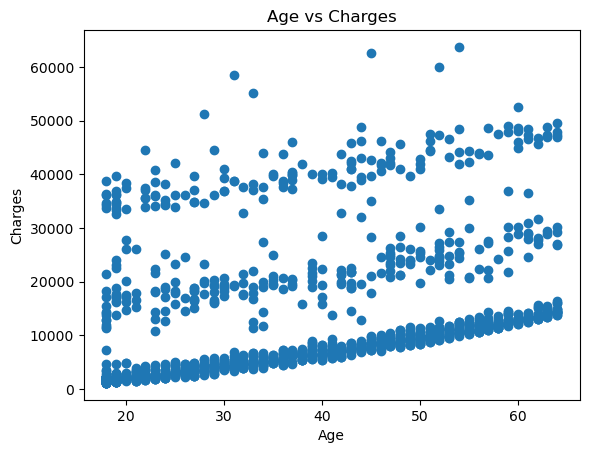

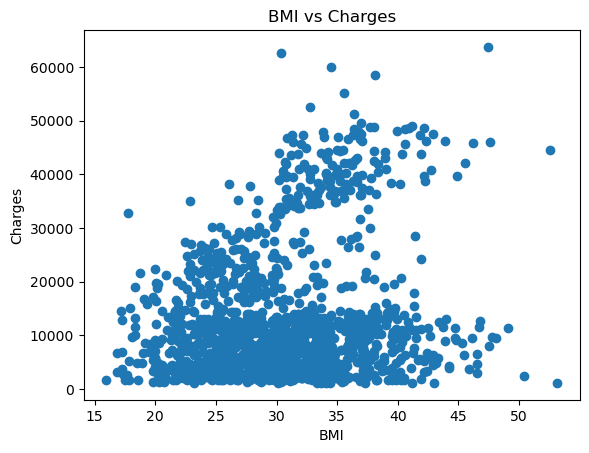

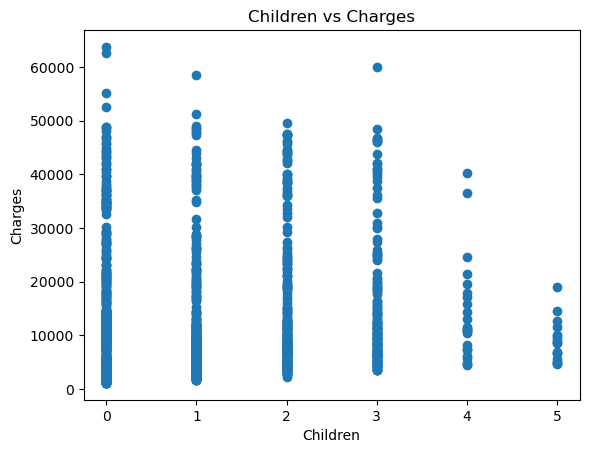

In [14]:
#Scatter plots to show correlation

import matplotlib.pyplot as plt

plt.scatter(insurance['age'], insurance['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

plt.scatter(insurance['bmi'], insurance['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.show()

plt.scatter(insurance['children'], insurance['charges'])
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Children vs Charges')
plt.show()

In [15]:
# Another way of Calculate mean charges for categorical variables

def avg_charges_categorical(df, category_col):
    avg_charges = df.groupby(category_col)['charges'].mean().round(2)
    return avg_charges



print(avg_charges_categorical(insurance, 'smoker'))

print(avg_charges_categorical(insurance, 'sex'))

print(avg_charges_categorical(insurance, 'region'))


smoker
no      8434.27
yes    32050.23
Name: charges, dtype: float64
sex
female    12569.58
male      13956.75
Name: charges, dtype: float64
region
northeast    13406.38
northwest    12417.58
southeast    14735.41
southwest    12346.94
Name: charges, dtype: float64


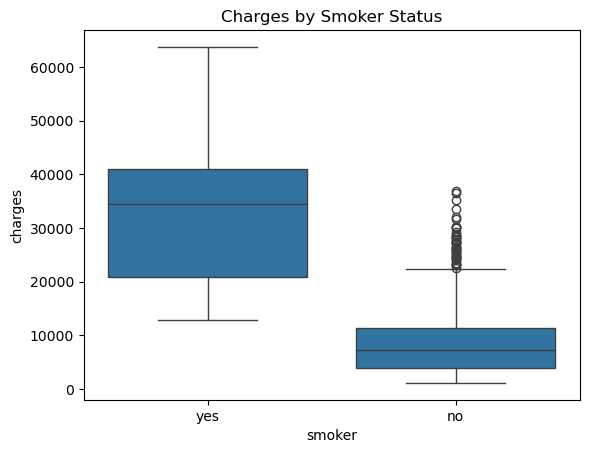

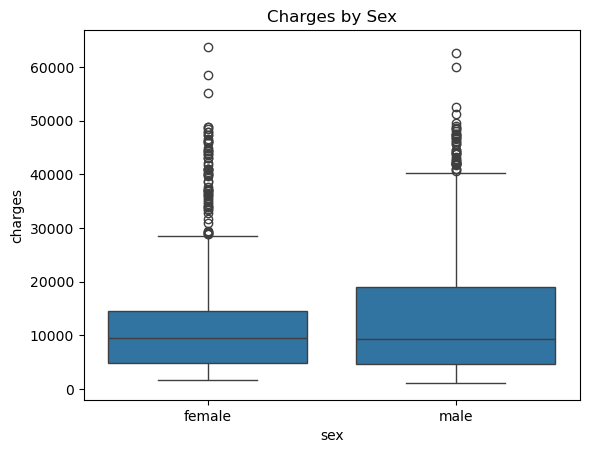

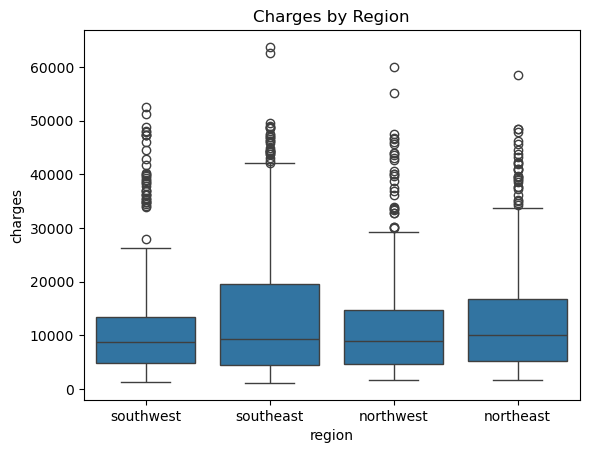

In [16]:
#Boxplot visualisation of above

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='smoker', y='charges', data=insurance)
plt.title('Charges by Smoker Status')
plt.show()

sns.boxplot(x='sex', y='charges', data=insurance)
plt.title('Charges by Sex')
plt.show()

sns.boxplot(x='region', y='charges', data=insurance)
plt.title('Charges by Region')
plt.show()

In [19]:
#crosstab shows how categorical variables are distrbiuted against eachother 



def crosstab_categorical(df, category_1, category_2):
    crosstab = pd.crosstab(df[category_1], df[category_2])
    return crosstab

print(crosstab_categorical(insurance, 'sex', 'smoker'))
print(crosstab_categorical(insurance, 'sex', 'region'))
print(crosstab_categorical(insurance, 'smoker', 'region'))
    



smoker   no  yes
sex             
female  547  115
male    517  159
region  northeast  northwest  southeast  southwest
sex                                               
female        161        164        175        162
male          163        161        189        163
region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


{'Average Charges': 13270.42, 'Average Age': 39.0, 'Average BMI': 31.0, 'Average Number of children': 1.0}
{'Median Charges': 9382.03, 'Median Age': 39.0, 'Median BMI': 30.0, 'Median Number of Children': 1.0}
{'Most common Sex': 'male', 'Most common Smoking preference': 'no', 'Most common Region': 'southeast', 'Most common Number of Children': 0}
{'Smoker vs Non-smoker Analysis': {'Smoker average Medical cost': 32050.23, 'Non-Smoker average Medical cost': 8434.27, 'Difference of Medical cost between a Smoker vs a Non_Smoker': 23615.96, 'Percentage difference of Medical cost for a smoker vs Non-Smoker': 280.0}}
{'Male vs Female Analysis': {'Male average Medical cost': 13956.75, 'Female average Medical cost': 12569.58, 'Difference of Medical cost between Men and Women': 1387.17, 'Percentage difference of Medical cost between Men and Women': 11.04}}
{'Average Charge per number of Children': {0: 12366, 1: 12731, 2: 15074, 3: 15355, 4: 13851, 5: 8786}}
 Please bare in mind that BMI is not a

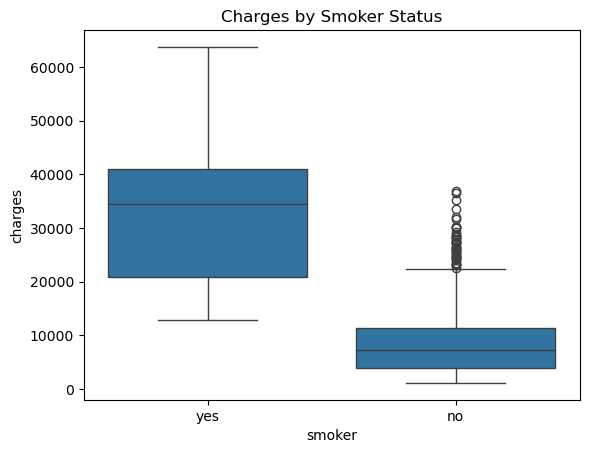

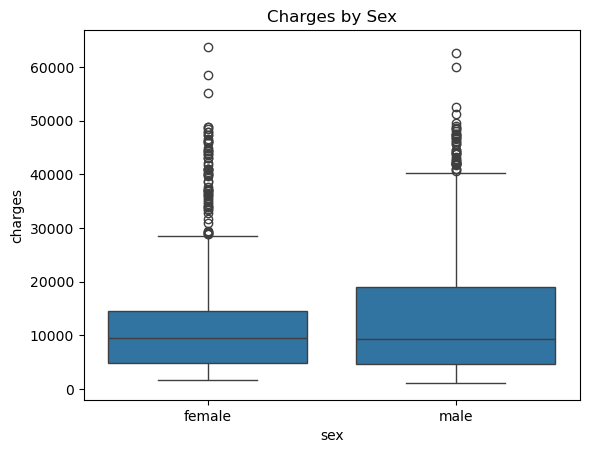

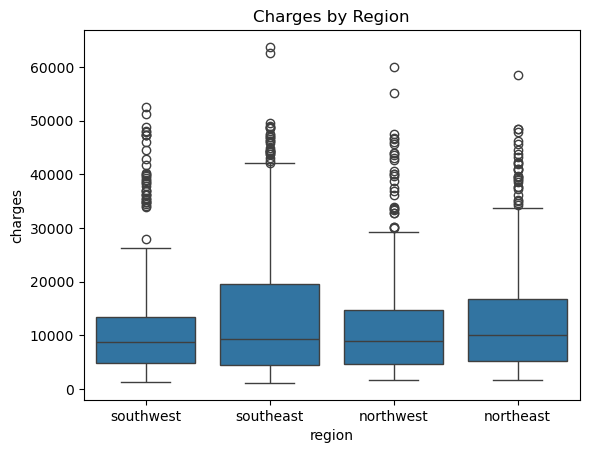

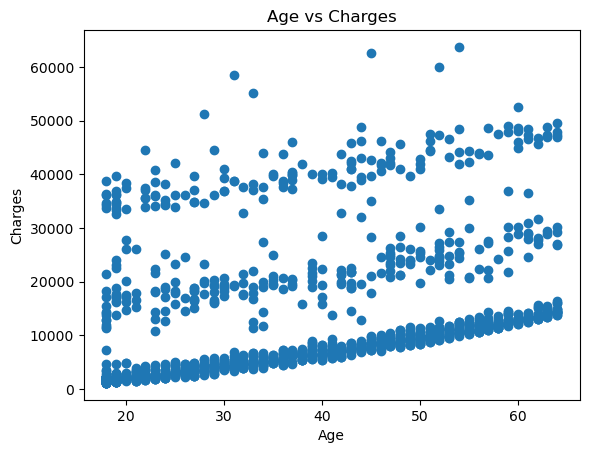

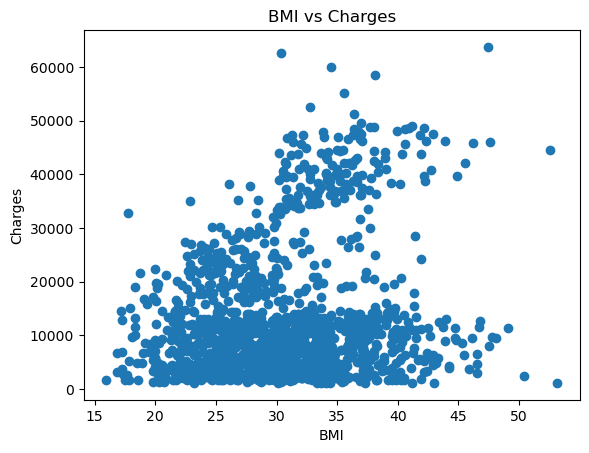

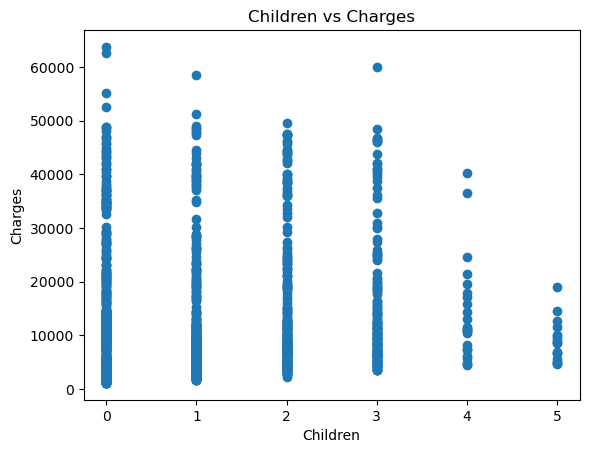

In [39]:
# Analysis summary

num_var_avg_summary = {'Average Charges':mean_charges,
                   'Average Age':mean_age,
                   'Average BMI':mean_bmi,
                   'Average Number of children':mean_children
                  }

num_var_median_summary = {'Median Charges':median_charges,
                          'Median Age':median_age,
                          'Median BMI':median_bmi,
                          'Median Number of Children':median_children
                         }

categorical_mode_summary = {'Most common Sex':mode_sex,
                            'Most common Smoking preference':mode_smoker,
                            'Most common Region':mode_region,
                            'Most common Number of Children':mode_children
                           }

smoker_analysis = {
        'Smoker vs Non-smoker Analysis': smoker_vs_non_smoker
    }

sex_analysis = {'Male vs Female Analysis': male_vs_female_cost
               }

children_analysis = {'Average Charge per number of Children':average_charge_per_children}

bmi_analysis = {'Average Charge per BMI category':average_bmi}

age_analysis = {'Average Charge per Age category':average_age_cost}

overall_correlation = {'Correlation analysis of all Variables': corr_matrix}

charges_correlation = {'Correlation analysis Variables vs Charges':charges_corr}

categorical_comparisons = {
    'Sex vs Smoker': crosstab_categorical(insurance, 'sex', 'smoker'),
    'Sex vs Region': crosstab_categorical(insurance, 'sex', 'region'),
    'Smoker vs Region': crosstab_categorical(insurance, 'smoker', 'region')
}

print(num_var_avg_summary)
print(num_var_median_summary)
print(categorical_mode_summary)
print(smoker_analysis)
print(sex_analysis)
print(children_analysis)
print(f' Please bare in mind that BMI is not an accurate estimation of healthy weights anymore: {bmi_analysis}')
print(age_analysis)
print(overall_correlation)
print(charges_correlation)



sns.boxplot(x='smoker', y='charges', data=insurance)
plt.title('Charges by Smoker Status')
plt.show()

sns.boxplot(x='sex', y='charges', data=insurance)
plt.title('Charges by Sex')
plt.show()

sns.boxplot(x='region', y='charges', data=insurance)
plt.title('Charges by Region')
plt.show()

plt.scatter(insurance['age'], insurance['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

plt.scatter(insurance['bmi'], insurance['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.show()

plt.scatter(insurance['children'], insurance['charges'])
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Children vs Charges')
plt.show()






In [41]:
#Analysis summary text

analysis_summary_text = f"""
Descriptive Statistics:
The average medical charge in the dataset is ${num_var_avg_summary['Average Charges']}, with a median of ${num_var_median_summary['Median Charges']}. 
The average age is {num_var_avg_summary['Average Age']} years (median {num_var_median_summary['Median Age']}), and the average BMI is {num_var_avg_summary['Average BMI']} (median {num_var_median_summary['Median BMI']}). 
On average, individuals have {num_var_avg_summary['Average Number of children']} children (median {num_var_median_summary['Median Number of Children']}). 
The most common sex is {categorical_mode_summary['Most common Sex']}, the majority are non-smokers ({categorical_mode_summary['Most common Smoking preference']}), the most common region is {categorical_mode_summary['Most common Region']}, and most individuals have {categorical_mode_summary['Most common Number of Children']} children.

Smoker Analysis:
Smokers have an average medical cost of ${smoker_analysis['Smoker vs Non-smoker Analysis']['Smoker average Medical cost']} compared to ${smoker_analysis['Smoker vs Non-smoker Analysis']['Non-Smoker average Medical cost']} for non-smokers. 
This is a difference of ${smoker_analysis['Smoker vs Non-smoker Analysis']['Difference of Medical cost between a Smoker vs a Non_Smoker']}, representing a {smoker_analysis['Smoker vs Non-smoker Analysis']['Percentage difference of Medical cost for a smoker vs Non-Smoker']}% increase in charges for smokers.

Sex Analysis:
Males have an average medical cost of ${sex_analysis['Male vs Female Analysis']['Male average Medical cost']} compared to ${sex_analysis['Male vs Female Analysis']['Female average Medical cost']} for females, with a difference of ${sex_analysis['Male vs Female Analysis']['Difference of Medical cost between Men and Women']} ({sex_analysis['Male vs Female Analysis']['Percentage difference of Medical cost between Men and Women']}%).

Children Analysis:
Average charges generally increase with the number of children, ranging from ${children_analysis['Average Charge per number of Children'][0]} for 0 children to ${children_analysis['Average Charge per number of Children'][3]} for 3 children. There is some variability for 4 and 5 children.

BMI Analysis:
Medical charges increase with BMI category, from ${bmi_analysis['Average Charge per BMI category']['underweight']} for underweight individuals to ${bmi_analysis['Average Charge per BMI category']['obesity (class 2)']} for class 2 obesity. (Note: BMI is a crude measure of health and may not accurately reflect healthy weight.)

Age Analysis:
Medical costs increase with age, from ${age_analysis['Average Charge per Age category']['0-18']} for 0–18 years to ${age_analysis['Average Charge per Age category']['56-65']} for 56–65 years. There is no data for the 66+ category.

Correlation Analysis:
Charges are moderately positively correlated with age (0.30) and BMI (0.20), and weakly correlated with number of children (0.068). The strongest factors influencing charges appear to be smoker status and BMI.

Categorical Comparisons:
Cross-tabulations show the distribution of sex vs smoker, sex vs region, and smoker vs region. No extreme imbalances are observed; the dataset appears reasonably balanced across these categories.

Overall, smoking status and BMI are the primary drivers of medical insurance charges, with age and number of children having moderate influence, and sex or region having minor impact. 
"""

print(analysis_summary_text)


Descriptive Statistics:
The average medical charge in the dataset is $13270.42, with a median of $9382.03. 
The average age is 39.0 years (median 39.0), and the average BMI is 31.0 (median 30.0). 
On average, individuals have 1.0 children (median 1.0). 
The most common sex is male, the majority are non-smokers (no), the most common region is southeast, and most individuals have 0 children.

Smoker Analysis:
Smokers have an average medical cost of $32050.23 compared to $8434.27 for non-smokers. 
This is a difference of $23615.96, representing a 280.0% increase in charges for smokers.

Sex Analysis:
Males have an average medical cost of $13956.75 compared to $12569.58 for females, with a difference of $1387.17 (11.04%).

Children Analysis:
Average charges generally increase with the number of children, ranging from $12366 for 0 children to $15355 for 3 children. There is some variability for 4 and 5 children.

BMI Analysis:
Medical charges increase with BMI category, from $8657.62 for u